In [2]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# list of crptocurrencies as ticker arguments
Crypto = ['PKR-USD','BNB-USD','ETH-USD','MANA-USD']

In [4]:
data = yf.download(Crypto, start='2021-07-01',
                end='2022-06-16')
data.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                                        Close  \
               BNB-USD      ETH-USD  MANA-USD   PKR-USD     BNB-USD   
Date                                                                  
2021-06-30  303.295868  2274.547607  0.580023  0.051757  303.295868   
2021-07-01  288.218414  2113.605469  0.552599  0.049391  288.218414   
2021-07-02  287.423096  2150.040283  0.539899  0.047307  287.423096   
2021-07-03  298.237122  2226.114258  0.559197  0.047058  298.237122   
2021-07-04  307.732086  2321.724121  0.580483  0.051868  307.732086   

                                                   High               ...  \
                ETH-USD  MANA-USD   PKR-USD     BNB-USD      ETH-USD  ...   
Date                                                                  ...   
2021-06-30  2274.547607  0.580023  0.051757  304.801361  2282.989014  ...   
2021-07-01  2113.605469  0.552599  0.049391  303.527374  2274.397461  ...   
2021-07-02  2150.040283  0.539899  0.047307  290.621674  2155.596436  ...   
2021-07-03  2226.114258  0.559197  0.047058  302.605865  2237.567139  ...   
2021-07-04  2321.724121  0.580483  0.051868  314.713013  2384.286865  ...   

                 Low                  Open                                   \
            MANA-USD   PKR-USD     BNB-USD      ETH-USD  MANA-USD   PKR-USD   
Date                                                                          
2021-06-30  0.514488  0.048002  300.958801  2164.216309  0.549834  0.050890   
2021-07-01  0.523892  0.046192  303.527374  2274.397461  0.580019  0.051764   
2021-07-02  0.510870  0.043731  287.754456  2109.892578  0.550714  0.049332   
2021-07-03  0.529747  0.046187  287.215607  2150.834961  0.539151  0.047076   
2021-07-04  0.540764  0.045345  298.113556  2226.550293  0.559170  0.047061   

                Volume                                 
               BNB-USD      ETH-USD  MANA-USD PKR-USD  
Date                                                   
2021-06-30  1903538448  25828056268  54994687  152906  
2021-07-01  1357794786  29061701793  50710401  139121  
2021-07-02  1133632645  31796212554  31471121  133235  
2021-07-03  1113777297  17433361641  30737592  120794  
2021-07-04  1387395766  18787107473  47432938  120445  

[5 rows x 24 columns]

In [5]:
# check for missing data
data.isnull().any()

Adj Close  BNB-USD     False
           ETH-USD     False
           MANA-USD    False
           PKR-USD     False
Close      BNB-USD     False
           ETH-USD     False
           MANA-USD    False
           PKR-USD     False
High       BNB-USD     False
           ETH-USD     False
           MANA-USD    False
           PKR-USD     False
Low        BNB-USD     False
           ETH-USD     False
           MANA-USD    False
           PKR-USD     False
Open       BNB-USD     False
           ETH-USD     False
           MANA-USD    False
           PKR-USD     False
Volume     BNB-USD     False
           ETH-USD     False
           MANA-USD    False
           PKR-USD     False
dtype: bool

In [6]:
adj_close=data['Adj Close']
adj_close.head()

,BNB-USD,ETH-USD,MANA-USD,PKR-USD
Date,,,,
2021-06-30,303.295868,2274.547607,0.580023,0.051757
2021-07-01,288.218414,2113.605469,0.552599,0.049391
2021-07-02,287.423096,2150.040283,0.539899,0.047307
2021-07-03,298.237122,2226.114258,0.559197,0.047058
2021-07-04,307.732086,2321.724121,0.580483,0.051868


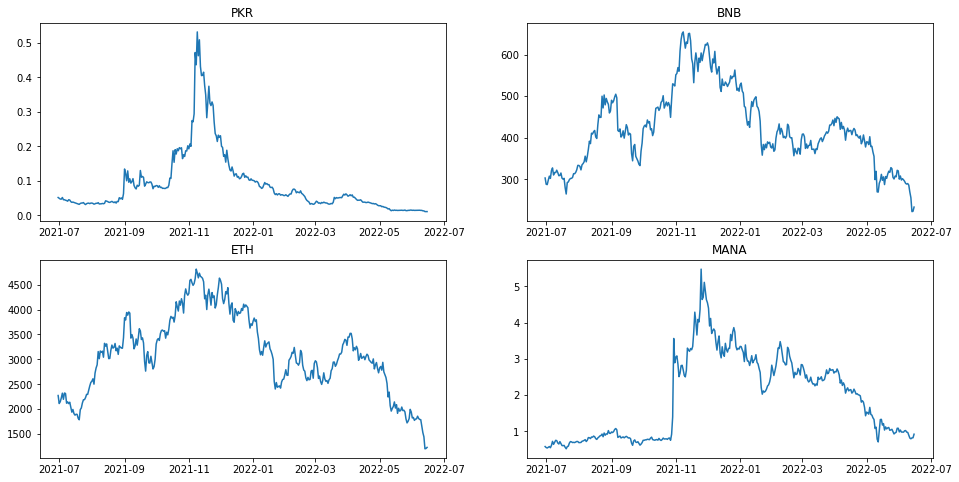

In [15]:
# ploting the adjusted closing price
fig, axs =plt.subplots(2,2,figsize=(16,8))
axs[0,0].plot(adj_close['PKR-USD'])
axs[0,0].set_title('PKR')
axs[0,1].plot(adj_close['BNB-USD'])
axs[0,1].set_title('BNB')
axs[1,0].plot(adj_close['ETH-USD'])
axs[1,0].set_title('ETH')
axs[1,1].plot(adj_close['MANA-USD'])
axs[1,1].set_title('MANA')

plt.show()

In [8]:
# Returns i.e. percentage change in the adjusted close price and drop the first row with NA's
returns = adj_close.pct_change().dropna(axis=0)
#view the first 5 rows of the data frame
returns.head()

,BNB-USD,ETH-USD,MANA-USD,PKR-USD
Date,,,,
2021-07-01,-0.049712,-0.070758,-0.047281,-0.045714
2021-07-02,-0.002759,0.017238,-0.022982,-0.042194
2021-07-03,0.037624,0.035383,0.035744,-0.005263
2021-07-04,0.031837,0.042949,0.038065,0.102214
2021-07-05,-0.017399,-0.053039,-0.056570,-0.125916


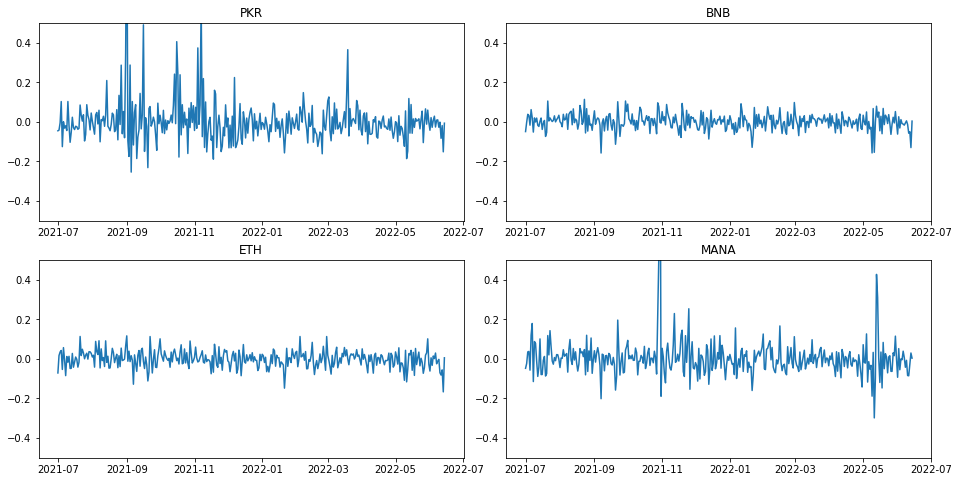

In [51]:
#ploting the returns
fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(returns['PKR-USD'])
axs[0,0].set_title('PKR')
axs[0,0].set_ylim([-0.5,0.5])
axs[0,1].plot(returns['BNB-USD'])
axs[0,1].set_title('BNB')
axs[0,1].set_ylim([-0.5,0.5])
axs[1,0].plot(returns['ETH-USD'])
axs[1,0].set_title('ETH')
axs[1,0].set_ylim([-0.5,0.5])
axs[1,1].plot(returns['MANA-USD'])
axs[1,1].set_title('MANA')
axs[1,1].set_ylim([-0.5,0.5])
plt.show()

In [52]:
#Volatility

#volatility, standard deviation of the returns
returns.std()


BNB-USD     0.041155
ETH-USD     0.042784
MANA-USD    0.113532
PKR-USD     0.114862
dtype: float64

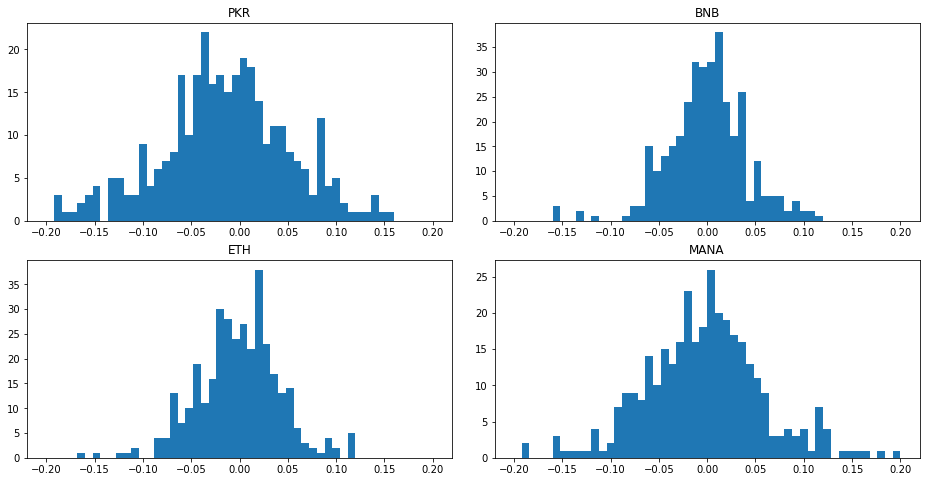

In [53]:
#ploting the histogram
fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].hist(returns['PKR-USD'], bins=50, range=(-0.2, 0.2))
axs[0,0].set_title('PKR')
axs[0,1].hist(returns['BNB-USD'], bins=50, range=(-0.2, 0.2))
axs[0,1].set_title('BNB')
axs[1,0].hist(returns['ETH-USD'], bins=50, range=(-0.2, 0.2))
axs[1,0].set_title('ETH')
axs[1,1].hist(returns['MANA-USD'], bins=50, range=(-0.2, 0.2))
axs[1,1].set_title('MANA')
plt.show()

In [54]:
cum_returns = ((1 + returns).cumprod() - 1) *100
cum_returns.head()

,BNB-USD,ETH-USD,MANA-USD,PKR-USD
Date,,,,
2021-07-01,-4.971203,-7.075787,-4.728085,-4.571360
2021-07-02,-5.233428,-5.473938,-6.917657,-8.597872
2021-07-03,-1.667925,-2.129362,-3.590544,-9.078964
2021-07-04,1.462670,2.074105,0.079312,0.214461
2021-07-05,-0.302634,-3.339789,-5.582196,-12.404122


Text(0.5, 1.0, 'Cumulative Returns')

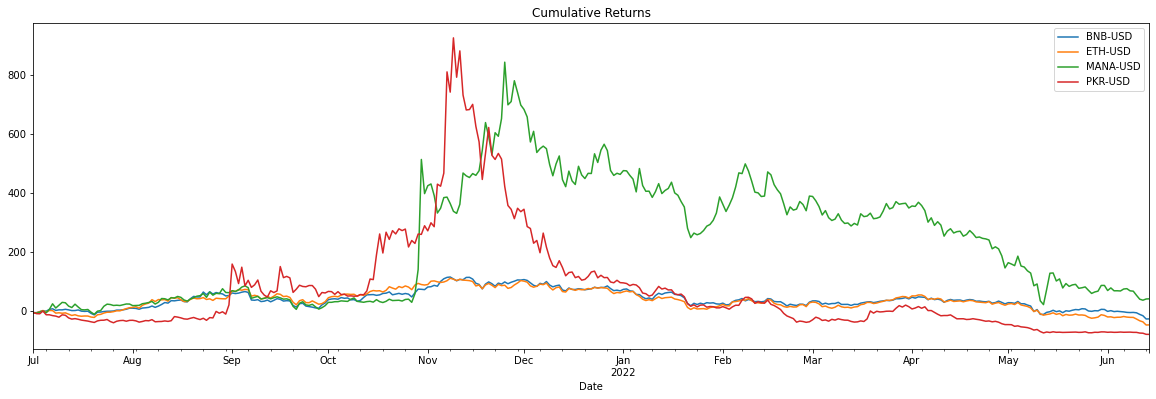

In [55]:
cum_returns.plot(figsize=(20,6))
plt.title('Cumulative Returns')



In [56]:
returns.corr()

,BNB-USD,ETH-USD,MANA-USD,PKR-USD
BNB-USD,1.000000,0.831969,0.432711,0.335717
ETH-USD,0.831969,1.000000,0.388397,0.400886
MANA-USD,0.432711,0.388397,1.000000,0.138238
PKR-USD,0.335717,0.400886,0.138238,1.000000
